# Графики распределений - Distribution Plots
Графики распределений отображают одну непрерывную переменную, и помогают визуализировать атрибуты этой переменной, например среднее значение или дисперсию.

Три основных типа графиков:
* Rug Plot
* Histogram
* KDE Plot

### График Rug Plot

**Rug Plot** - простейший из графиков распределения, на примере зарплат сотрудников, в нём для каждого сотрудника мы ставим точку на горизонтальной оси. Вертикальная ось по сути не используется.

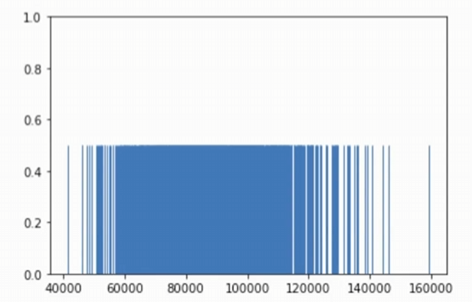

На таких графиках очень хорошо видны крайние значения.

### Как создается график **Histogam**.

Для некоторой непрерывной переменной строится график **Rug Plot**:

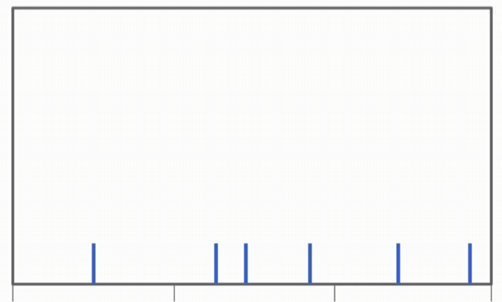

Чтобы построить гистограмму сначала выбирается некоторое количество интервалов - bins, с помощью которых горизонтальная ось будет разбиваться на равные промежутки.

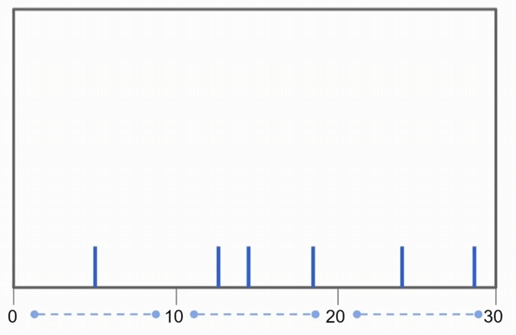

Далее для каждого интервала подсчитывается количество точек:

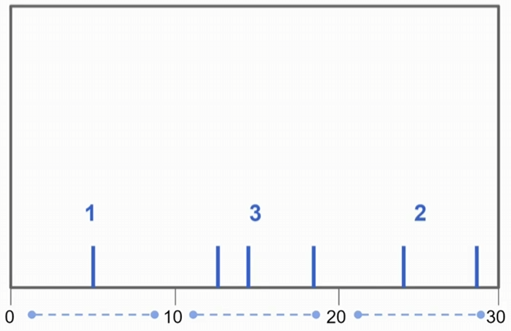

На последнем шаге мы нарисуем вертикальный прямоугольник, высота которого будет равна количеству точек в том или ином интервале.

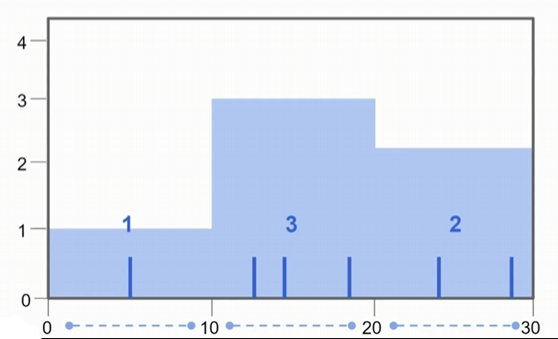

При желании по оси y можно выполнить нормализацию значений, чтобы перейти от абсолютных значений к процентам.

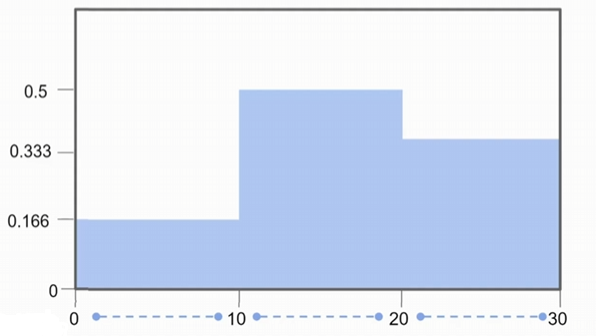

Чтобы сделать гистограмму более детальной, можно увеличить количество значений по оси x.

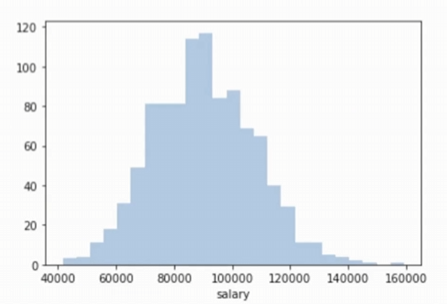

### График KDE
Seaborn позволяет добавить поверх гистограммы график KDE

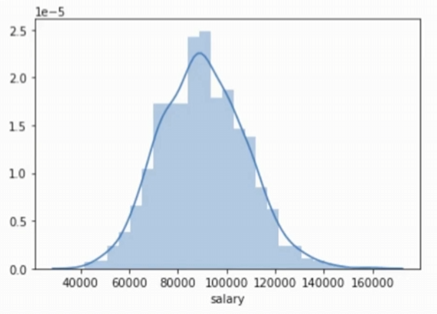

Он показывает, как может выглядеть распределение вероятности для случайной переменной если значение этой переменной получаются из приведенного набора данных.

KDE - Kernel Density Estimation (ядерная оценка плотности). Это способ оценки функции распределения случайной величины. По сути - это способ построения непрерывного графика по некоторому набору дискретных данных.

В графике KDE можно поменять такие параметры, как функцию ядра (kernel) и ширину полосы (bandwidth), чтобы изобразить больше или меньше вариации, содержащейся в данных.

# Построение графиков распределений

---

## Данные

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('dm_office_sales.csv')
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


## Построение графика Rugplot
Очень простой график, на котором каждая точка данных отображается одной точкой на графике. На вход этой функции подаётся одномерный массив данных.  

**Такой график не очень нагляден для больших объёмов данных!**

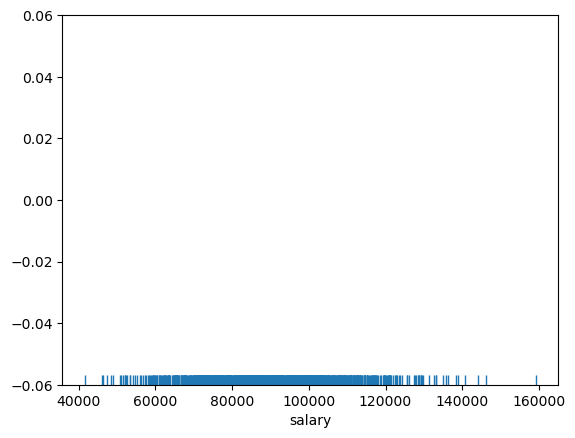

In [14]:
# Ось y по сути ничего не обозначает
# По оси X мы просто наносим точки
sns.rugplot(data=df, x='salary')
plt.show()

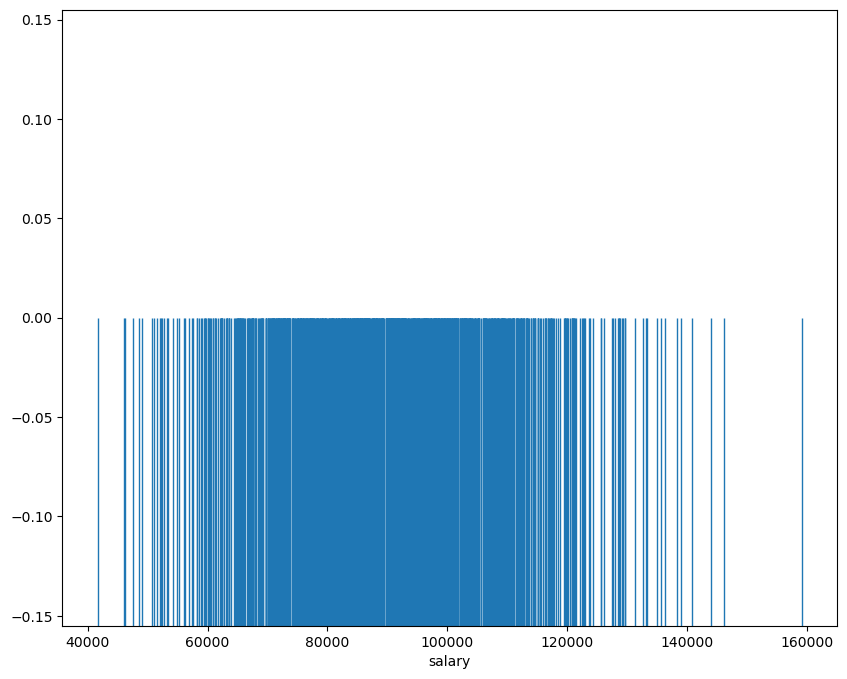

In [22]:
plt.figure(figsize=(10, 8), dpi=100)
# Можно отрегулировать высоту в процентах
sns.rugplot(data=df, x='salary', height=0.5)
plt.show()

## Методы .displot() и .histplot()
Предыдущий график не очень информативен на больших объемах данных, так как отдельные точки становится сложно отделить друг от друга. Намного более практичный способ - посчитать количество точек на том или ином отрезке оси X, и на эих данных построить гистограмму.

### Метод .displot()
График displot позволяет отобразить распределение одной переменной. Это гистограмма, и в качестве опции можно добавить график KDE поверх этой гистограммы.

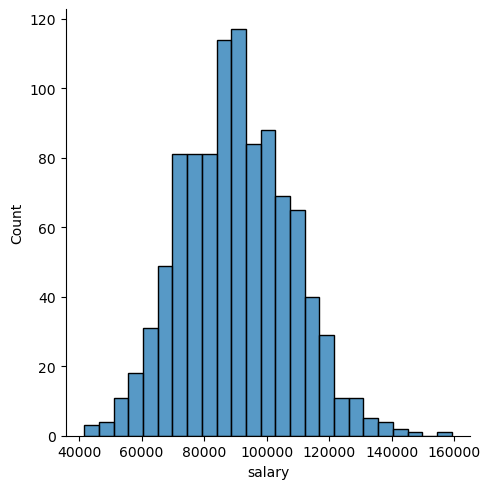

In [27]:
sns.displot(data=df, x='salary')
plt.show()

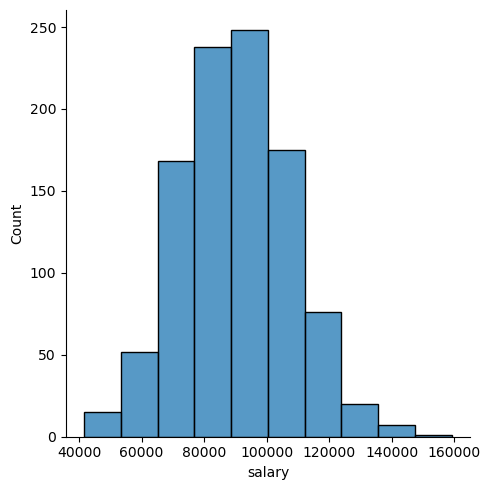

In [31]:
# Можно отредактировать параметры гистограммы
sns.displot(data=df, x='salary', bins=10)
plt.show()

**Важно: sns.set(style='')** действует для всех команд в блокноте, а не для одной конкертной ячейки! Значением по умолчанию является 'white'.

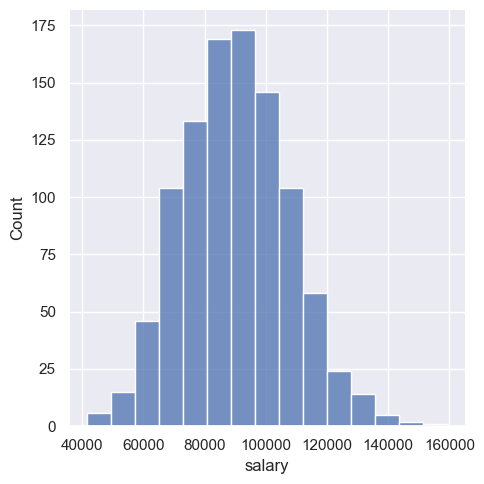

In [45]:
# При желании можно добавить сетку на задний фон
sns.set(style='darkgrid')
sns.displot(data=df, x='salary', bins=15)
plt.show()

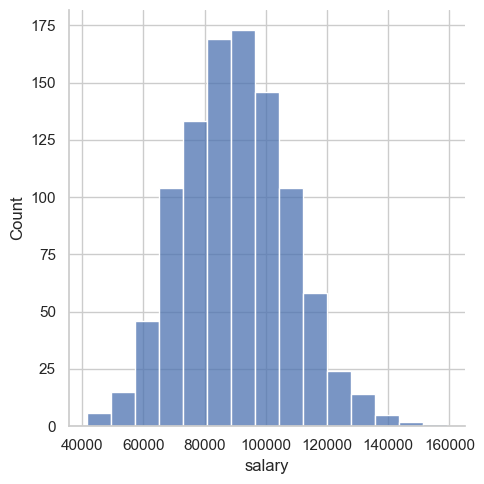

In [47]:
sns.set(style='whitegrid')
sns.displot(data=df, x='salary', bins=15)
plt.show()

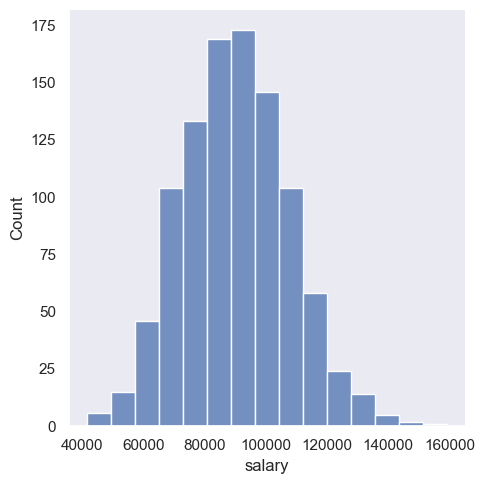

In [49]:
sns.set(style='dark')
sns.displot(data=df, x='salary', bins=15)
plt.show()

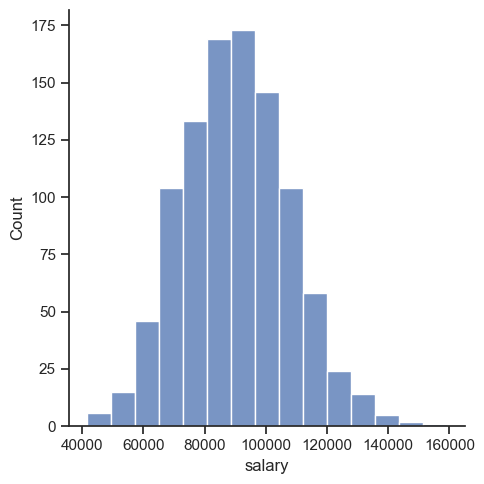

In [51]:
sns.set(style='ticks')
sns.displot(data=df, x='salary', bins=15)
plt.show()

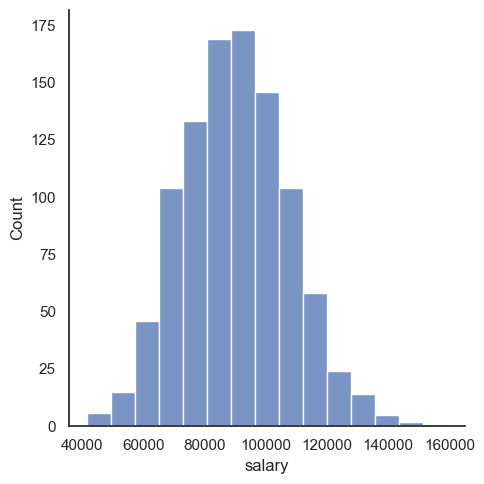

In [53]:
sns.set(style='white')
sns.displot(data=df, x='salary', bins=15)
plt.show()

### Добавление именованных параметров из matplotlib
Графики Seaborn могут работать с именованными параметрами из кода matplotlib, который используется в seaborn. Не каждый график seaborn принимает на вход все параметры matplotlib, но основные параметры стилизации обычно доступны.

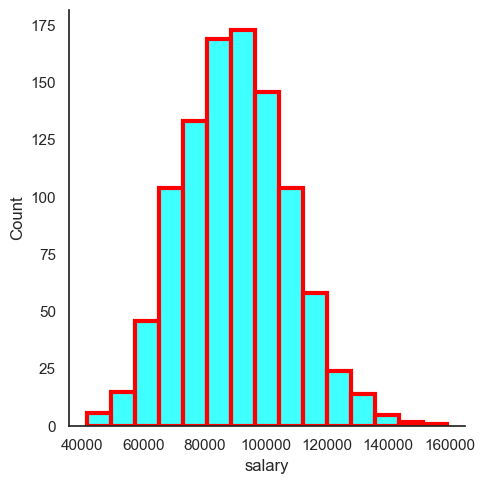

In [61]:
# Так же можно менять внешний вид с помощью методов matplotlib
sns.set(style='white')
sns.displot(data=df, x='salary', bins=15, color='aqua', edgecolor='red', linewidth=3)
plt.show()

### В методе .displot() можно добавить графики KDE и Rug Plot

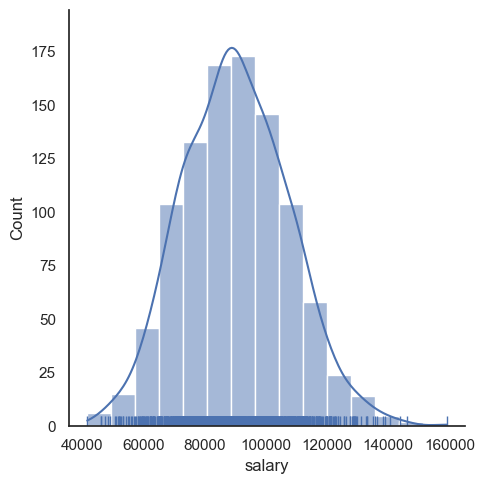

In [74]:
sns.displot(data=df, x='salary', bins=15, kde=True, rug=True)
plt.show()

### Метод .histplot()

Метод .displot() является более общей версией метода .histplot()

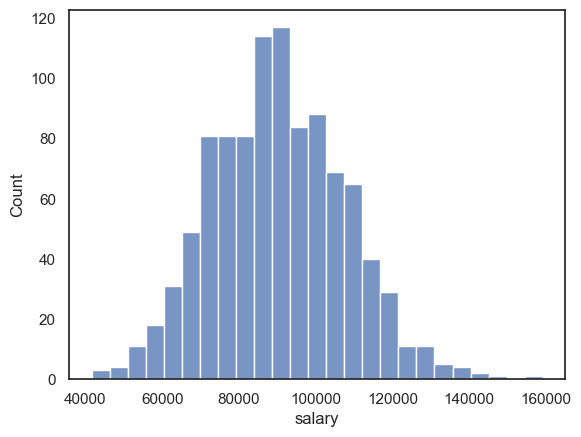

In [68]:
sns.histplot(data=df, x='salary')
plt.show()

### Если необходимо построить только график KDE, можно воспользоваться методом .kdeplot()

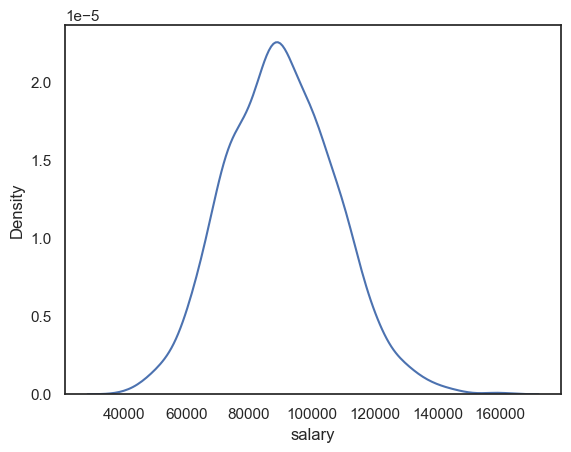

In [77]:
sns.kdeplot(data=df, x='salary')
plt.show()

## График Kernel Density Estimation - ядерная оценка плотности

График KDE отображает оценку *плотности* функции некоторой случайной велечины. По сути это задача сглаживания данных, где мы делаем некоторые предположенич на основе ограниченного набора имеющихся данных.

In [80]:
np.random.seed(42)

# randint выдаёт равномерно случайные числа - 
# мы получаем каждое значение возвраста с одинаковой вероятностью
# Замечание: в реальной жизни возраст почти никогда не является равномерно распределённым, 
# так что это упрощённый пример
sample_ages = np.random.randint(0, 100, 200)
sample_ages

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74, 87, 99, 23,  2, 21, 52,  1,
       87, 29, 37,  1, 63, 59, 20, 32, 75, 57, 21, 88, 48, 90, 58, 41, 91,
       59, 79, 14, 61, 61, 46, 61, 50, 54, 63,  2, 50,  6, 20, 72, 38, 17,
        3, 88, 59, 13,  8, 89, 52,  1, 83, 91, 59, 70, 43,  7, 46, 34, 77,
       80, 35, 49,  3,  1,  5, 53,  3, 53, 92, 62, 17, 89, 43, 33, 73, 61,
       99, 13, 94, 47, 14, 71, 77, 86, 61, 39, 84, 79, 81, 52, 23, 25, 88,
       59, 40, 28, 14, 44, 64, 88, 70,  8, 87,  0,  7, 87, 62, 10, 80,  7,
       34, 34, 32,  4, 40, 27,  6, 72, 71, 11, 33, 32, 47, 22, 61, 87, 36,
       98, 43, 85, 90, 34, 64, 98, 46, 77,  2,  0,  4, 89, 13, 26,  8, 78,
       14, 89, 41, 76, 50, 62, 95, 51, 95,  3, 93, 22, 14, 42, 28, 35, 12,
       31, 70, 58, 85, 27, 65, 41, 44, 61, 56,  5, 27, 27, 43, 83, 29, 61,
       74, 91, 88, 61, 96,  0, 26, 61, 76,  2, 69, 71, 26])

In [82]:
sample_ages = pd.DataFrame(sample_ages, columns=['age'])
sample_ages

,age
0,51
1,92
2,14
3,71
4,60
...,...
195,76
196,2
197,69
198,71


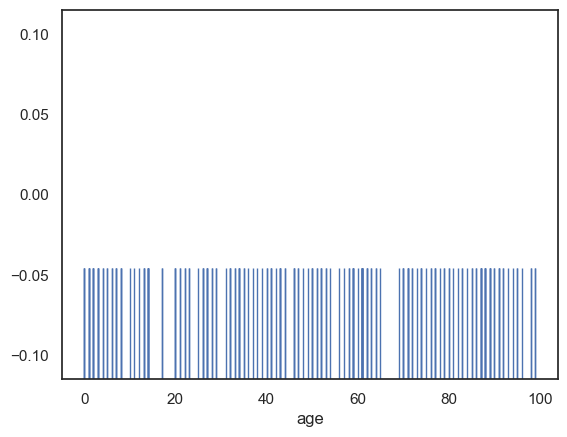

In [88]:
sns.rugplot(data=sample_ages, x='age', height=0.3)
plt.show()

<Figure size 1200x800 with 0 Axes>

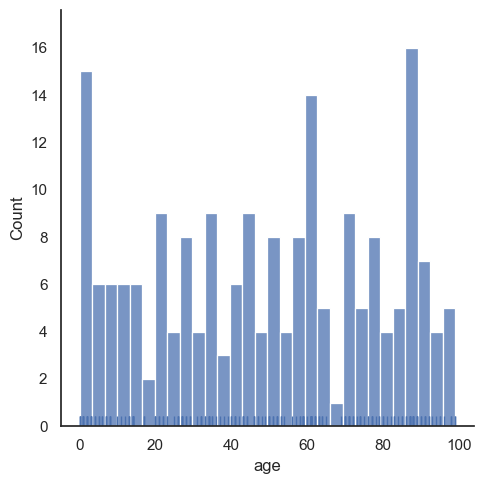

In [94]:
plt.figure(figsize=(12, 8))
sns.displot(data=sample_ages, x='age', rug=True, bins=30)
plt.show()

<Figure size 1200x800 with 0 Axes>

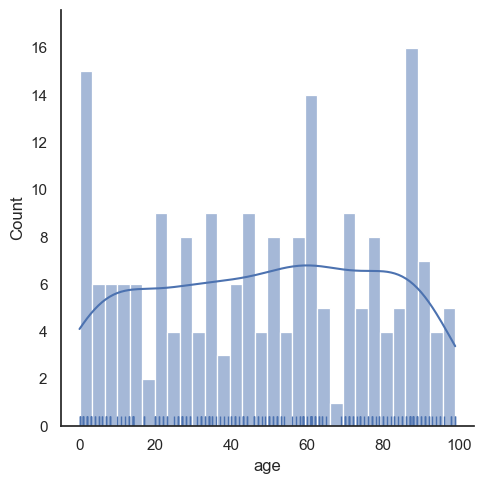

In [96]:
plt.figure(figsize=(12, 8))
sns.displot(data=sample_ages, x='age', kde=True, rug=True, bins=30)
plt.show()

**Здесь KDE - ограничен в диапазоне значений от 0 до 100, так как график KDE строится поверх гистограммы, а она рисуется только от 0 до 100.**

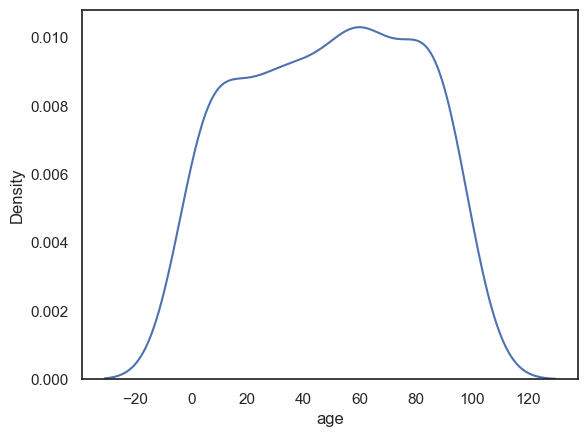

In [116]:
sns.kdeplot(data=sample_ages, x='age')
plt.show()

**Здесь KDE расположена на более широком диапазоне, который при необходимости можно уменьшить.**

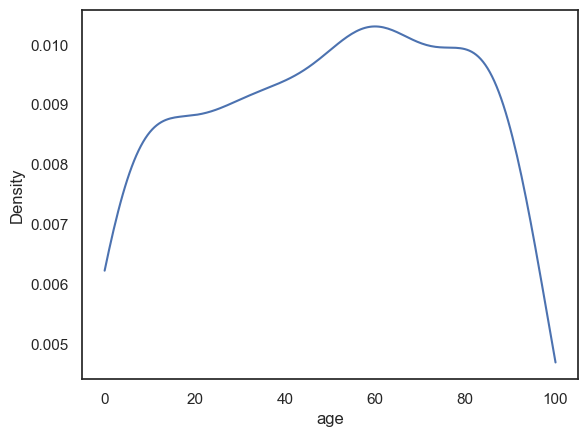

In [114]:
sns.kdeplot(data=sample_ages, x='age', clip=[0, 100])
plt.show()

### Ширина полосы - Bandwidth
KDE строится на основе некоторой ядерной функции (обычно на основе базовой функции Гаусса), и мы можем сделать KDE более "чувствительным" к данным, подбирая параметр "ширина полосы" (bandwidth). При меньшем знечении ширины полосы, значения становятся более собранными по ширине. В итоге мы можем не выполнять отсечение данных слева и справа. Уменьшение ширины полосы очень похоже на увеличение количества отрезков (bins) для гистограммы, когда каждый отрезок становится всё меньше и меньше.

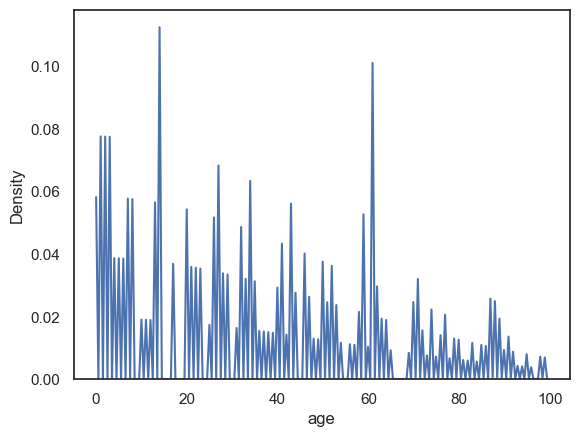

In [112]:
sns.kdeplot(data=sample_ages, x='age', clip=[0, 100], bw_adjust=0.01)
plt.show()

**Чем больше увеличивается данный параметр, тем меньше и меньше учитывается шум в данных.**

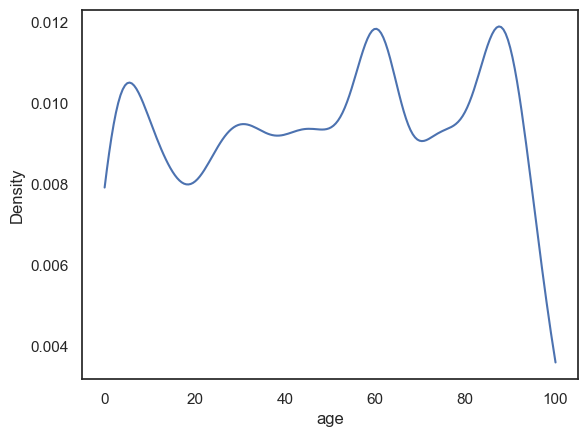

In [121]:
sns.kdeplot(data=sample_ages, x='age', clip=[0, 100], bw_adjust=0.5)
plt.show()

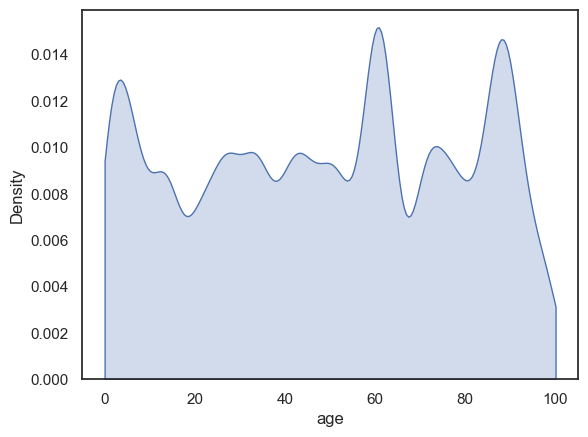

In [128]:
# В старых версиях seaborn используется shade вместо fill
sns.kdeplot(data=sample_ages, x='age', clip=[0, 100], bw_adjust=0.3, fill=True)
plt.show()

### Стилизация
Для KDE доступны несколько базовых команд по настройке стиля.

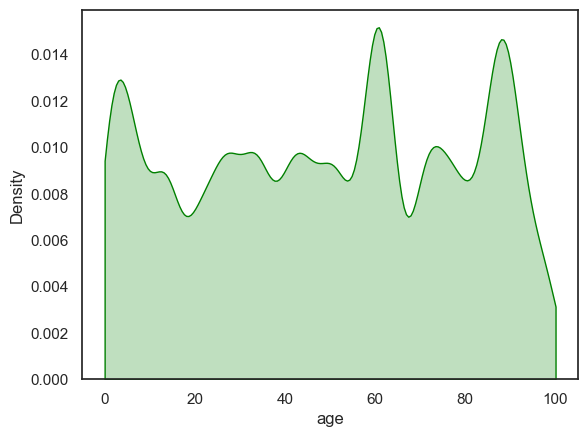

In [133]:
sns.kdeplot(data=sample_ages, x='age', clip=[0, 100], bw_adjust=0.3, fill=True, color='green')
plt.show()

## Двумерные графики KDE
Здесь мы сравниваем две непрерывные переменные, и создаём двумерный график KDE, на котором отображаем распределение с помощью той же самой функции kdeplot(). Эта тема будет рассмотрена позже более подробно, когда будем сравнивать две переменные друг с другом.

In [136]:
random_data = pd.DataFrame(np.random.normal(0, 1, size=(100, 2)), columns=['x', 'y'])
random_data

,x,y
0,-1.415371,-0.420645
1,-0.342715,-0.802277
2,-0.161286,0.404051
3,1.886186,0.174578
4,0.257550,-0.074446
...,...,...
95,-0.208122,-0.493001
96,-0.589365,0.849602
97,0.357015,-0.692910
98,0.899600,0.307300


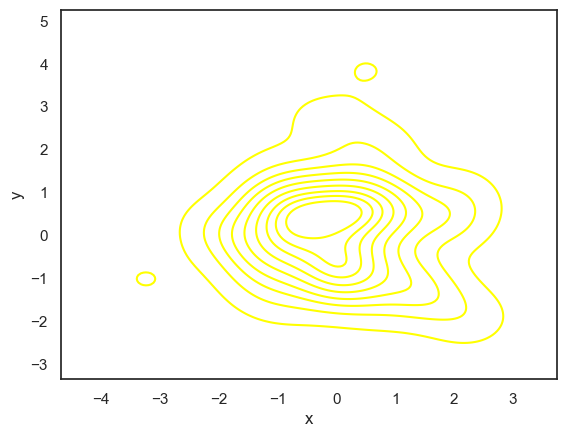

In [140]:
sns.kdeplot(data=random_data, x='x', y='y', color='yellow')
plt.show()

---